# Medical Image Computing - Tutorial 1
#This tutorial gives a brief introduction to medical image data analysis, visualization, and processing.

In [7]:
# load the required modules
import numpy as np
import SimpleITK as sitk

# Documentation
SimpleITK classes and functions have the Docstrings derived from the C++ definitions and the Doxygen documentation.

In [8]:
help(sitk.Image.GetPixel)

Help on function GetPixel in module SimpleITK.SimpleITK:

GetPixel(self, *idx)
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [30]:
import os
image = sitk.ReadImage('.\dataset\image.nii.gz')

In [31]:
datafolder=os.getcwd()
dd=os.path.join(datafolder+'\image.nii.gz')
dd

'C:\\Users\\moona\\Desktop\\SITKtutorial\\SimpleITK-Notebooks-master\\SimpleITK-Notebooks-master\\image.nii.gz'

In [33]:
import os
image = sitk.ReadImage('.\dataset\image2.nii.gz')

In [34]:
imageSize = image.GetSize()
n_rows = imageSize[0]
n_cols = imageSize[1]
n_slices = imageSize[2]
print ("(Image Size) number of rows:%d cols:%d slices:%d " % (imageSize[0],imageSize[1],imageSize[2]))

(Image Size) number of rows:256 cols:256 slices:150 


In [36]:
import os
imagedcm = sitk.ReadImage('.\dataset\MR-MONO2-8-16x-heart')

In [37]:
imageSize = imagedcm.GetSize()
n_rows = imageSize[0]
n_cols = imageSize[1]
n_slices = imageSize[2]
print ("(Image Size) number of rows:%d cols:%d slices:%d " % (imageSize[0],imageSize[1],imageSize[2]))

(Image Size) number of rows:256 cols:256 slices:16 


In [88]:
import os
imagedcm1 = sitk.ReadImage('.\\dataset\\US-PAL-8-10x-echo')

In [89]:
imageSize = imagedcm1.GetSize()
n_rows = imageSize[0]
n_cols = imageSize[1]
n_slices = imageSize[2]
print ("(Image Size) number of rows:%d cols:%d slices:%d " % (imageSize[0],imageSize[1],imageSize[2]))

(Image Size) number of rows:600 cols:430 slices:10 


In [90]:
print(imagedcm1.GetOrigin())
print(imagedcm1.GetDirection())

(0.0, 0.0, 0.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [91]:
print(imagedcm1.GetSpacing)

<bound method Image.GetSpacing of <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000002366F078660> >>


In [54]:
imagedcm1.GetPixel(10,10,2)
#imagedcm1.SetPixel(10,10,2,0)

(0, 0, 0)

In [61]:
print("The pixel value at x=50, y=50, z=50 is %d" % int(image.GetPixel(50, 50, 50)))

The pixel value at x=50, y=50, z=50 is 100


In [62]:
image.SetPixel(50, 50, 50, 100)
print ("The new value is %d" % int(image.GetPixel(50, 50, 50)))

The new value is 100


In [63]:
print("The pixel value at x=50, y=50, z=50 is %d" % int(image.GetPixel(50, 50, 50)))

The pixel value at x=50, y=50, z=50 is 100


# Image dimensions

In [32]:
imageSize = image.GetSize()
n_rows = imageSize[0]
n_cols = imageSize[1]
n_slices = imageSize[2]
print ("(Image Size) number of rows:%d cols:%d slices:%d " % (imageSize[0],imageSize[1],imageSize[2]))

(Image Size) number of rows:200 cols:225 slices:200 


# Image orientation and origin in world coordinate space

In [ ]:
print image.GetOrigin()
print image.GetDirection()

# Voxel size

In [ ]:
print image.GetSpacing()

# Reading and assigning pixel values

In [64]:
print("The pixel value at x=50, y=50, z=50 is %d" % int(image.GetPixel(50, 50, 50)))
image.SetPixel(50, 50, 50, 10)
print ("The new value is %d" % int(image.GetPixel(50, 50, 50)))

The pixel value at x=50, y=50, z=50 is 100
The new value is 10


In [65]:
print(image[50,50,50])

10


# Image statistics

In [67]:
stats = sitk.StatisticsImageFilter()
stats.Execute( image )
max = stats.GetMaximum()
min = stats.GetMinimum()
print('Min intensity = {0} \nMax intensity = {1}'.format(min, max))

Min intensity = 0.0 
Max intensity = 255.0


# Intensity rescaling

In [68]:
# Linearly rescale the intensity values
outputMinimum = 0
outputMaximum = 1024 
rescaled_image = sitk.RescaleIntensity(image,outputMinimum,outputMaximum)
stats.Execute( rescaled_image )
max = stats.GetMaximum()
min = stats.GetMinimum()
print('Min intensity = {0} \nMax intensity = {1}'.format(min, max))

Min intensity = 0.0 
Max intensity = 0.0


# Conversion between numpy and SimpleITK
Conversion between numpy and SimpleITK
SimpleITK and numpy indexing access is in opposite order!

SimpleITK: image[x,y,z]
numpy: image_numpy_array[z,y,x]

From SimpleITK to numpy
We have two options for converting from SimpleITK to numpy:

GetArrayFromImage(): returns a copy of the image data. You can then freely modify the data as it has no effect on the original SimpleITK image.
GetArrayViewFromImage(): returns a view on the image data which is useful for display in a memory efficient manner. You cannot modify the data and the view will be invalid if the original SimpleITK image is deleted.

In [70]:
#Conversion between numpy and SimpleITK

nda = sitk.GetArrayFromImage(image) # function GetArrayFromImage produced numpy array from itk image object
print(nda) # size of numpy array is opposite to sitk image object
print(nda.shape)
print(nda.ndim)
help(sitk.GetArrayFromImage)

# Get a view of the image data as a numpy array, useful for display
#nda = sitk.GetArrayViewFromImage(image)
#print(nda.shape)
#print(nda.ndim)
#help(sitk.GetArrayViewFromImage)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(150, 256, 256)
3
Help on function GetArrayFromImage in module SimpleITK.SimpleITK:

GetArrayFromImage(image)
    Get a NumPy ndarray from a SimpleITK Image.
    
    This is a deep copy of the image buffer and is completely s

In [71]:
# conversion from numpy to back sitk object
img = sitk.GetImageFromArray(nda)
img.GetSize()

#%%
#The order of index and dimensions need careful attention during conversion
#ITK's Image class does not have a bracket operator. It has a GetPixel which 
#takes an ITK Index object as an argument, which is ordered as (x,y,z). 
#This is the convention that SimpleITK's Image class uses for the GetPixel method 
#and slicing operator as well. In numpy, an array is indexed in the opposite order (z,y,x). 
#Also note that the access to channels is different. 
#In SimpleITK you do not access the channel directly, 
#rather the pixel value representing all channels for the specific pixel is returned 
#and you then access the channel for that pixel. 
#In the numpy array you are accessing the channel directly. 

(256, 256, 150)

In [73]:
# swap the axis to make number of channels at the end
numpy_array=np.swapaxes(nda,0,2)
print(numpy_array.shape)

(256, 256, 150)


In [74]:
numpy_array1=numpy_array[:,:,20]
print(numpy_array1.shape)

(256, 256)


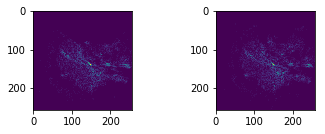

In [77]:
import matplotlib.pyplot as plt
plt.subplot(10,10,1)
plt.imshow(numpy_array[:,:,1])
plt.subplot(10,10,2)
plt.imshow(numpy_array[:,:,2])
plt.show()

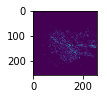

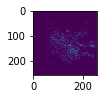

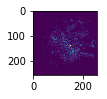

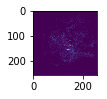

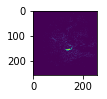

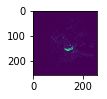

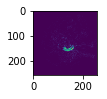

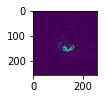

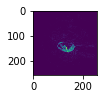

In [80]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(numpy_array[:,:,i])
    plt.show()

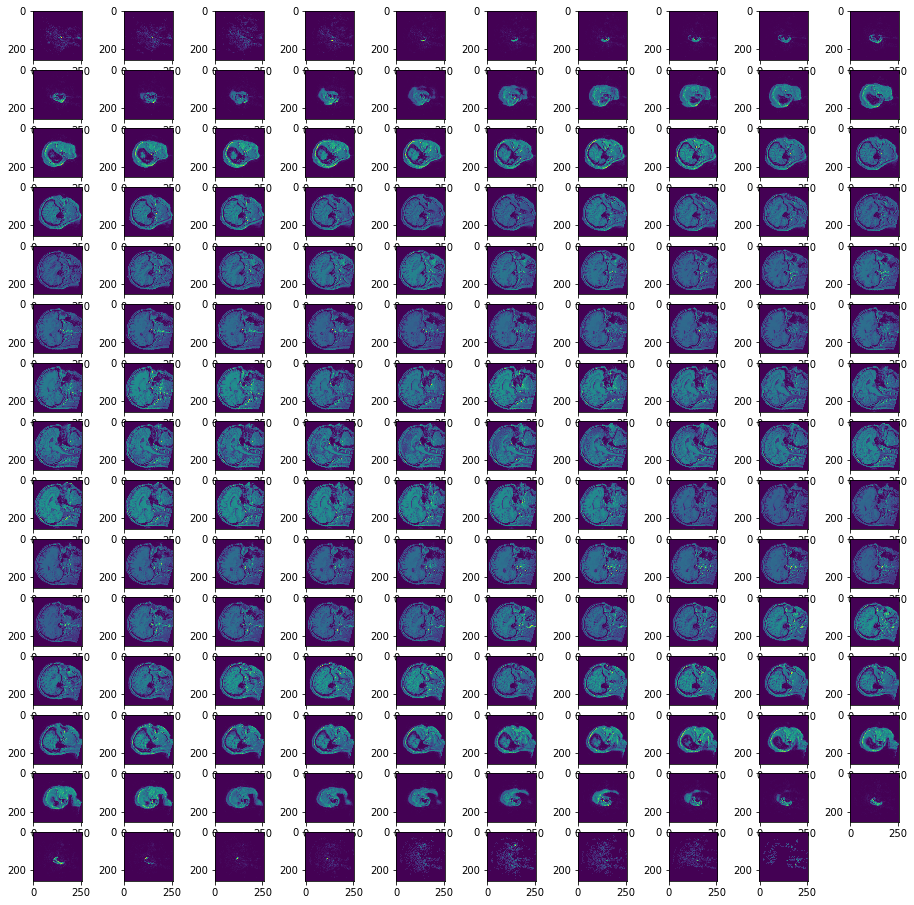

In [86]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16, 16))
columns = 10
rows = 15
for i in range(1, columns*rows):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(numpy_array[:,:,i])
plt.show()

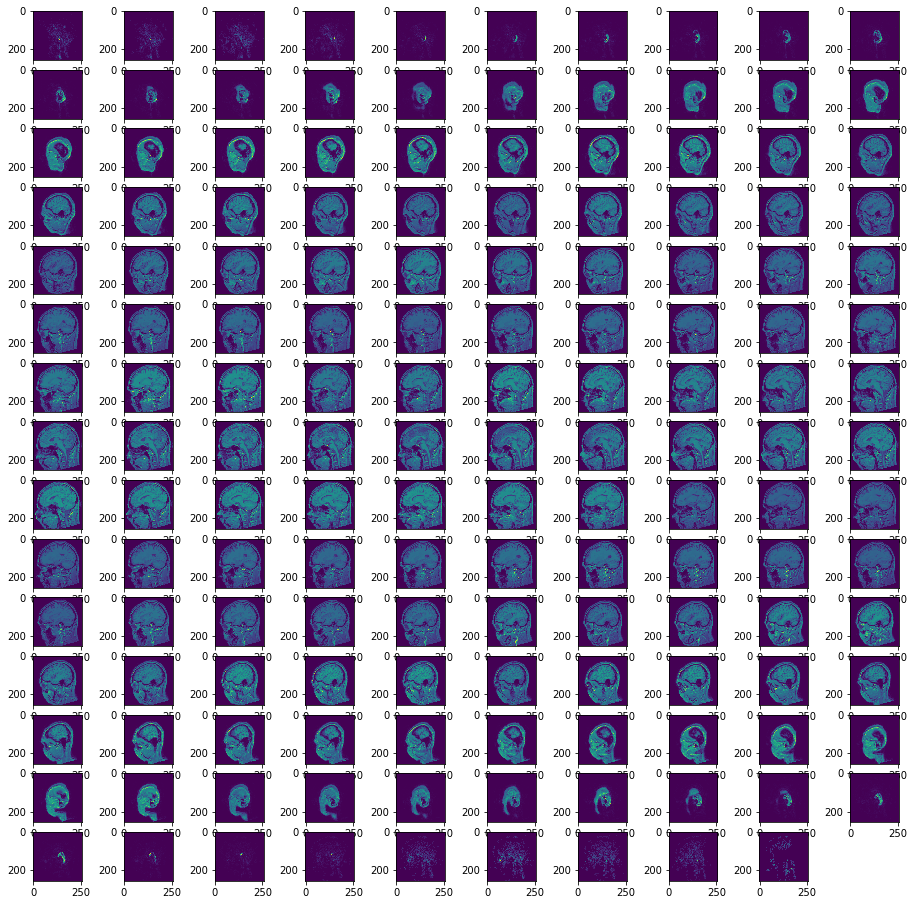

In [87]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16, 16))
columns = 10
rows = 15
for i in range(1, columns*rows):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(nda[i,:,:])
plt.show()

In [93]:
numpyarray=sitk.GetArrayFromImage(imagedcm1)
print(numpyarray.shape)

(10, 430, 600, 3)


In [94]:
numpyarray11=sitk.GetArrayFromImage(imagedcm)
print(numpyarray11.shape)

(16, 256, 256)


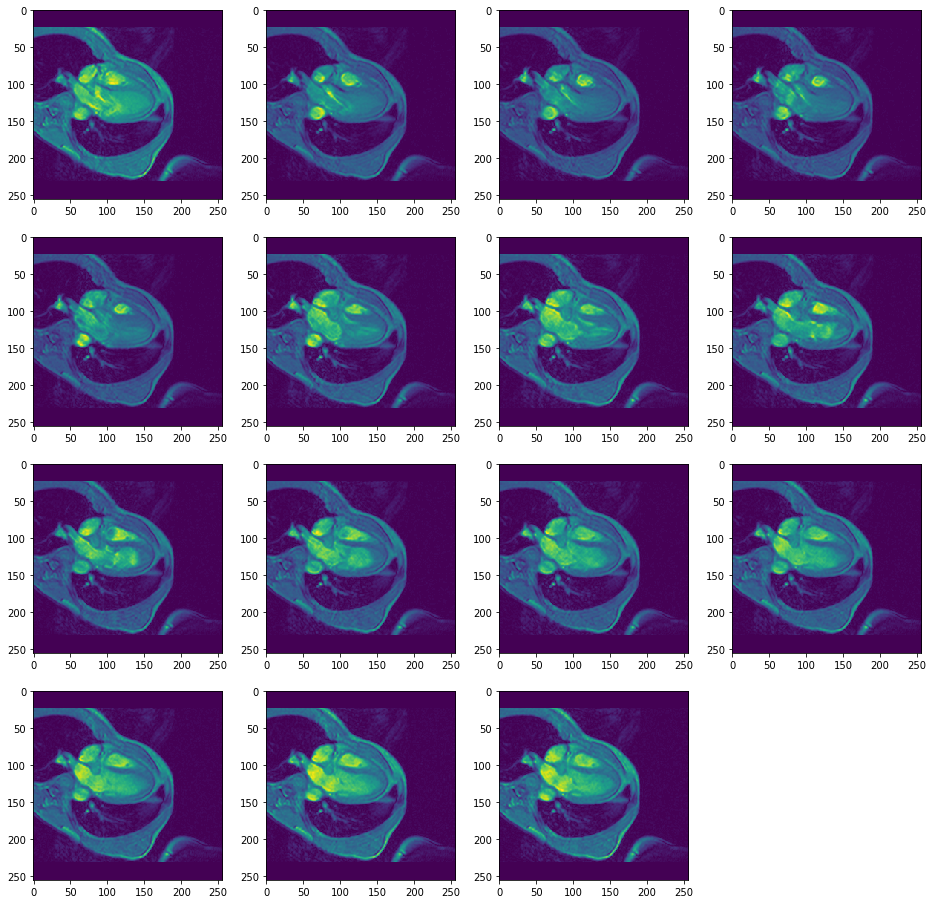

In [101]:
# plot these numpyarray
fig=plt.figure(figsize=(16,16))
rows=4
cols=4
for i in range(1,rows*cols):
    fig.add_subplot(rows,cols,i)
    plt.imshow(numpyarray11[i,:,:])
plt.show()

In [105]:
imgemha=sitk.ReadImage('.\dataset\Patient02Homo.mha')
print(imgemha.GetSize())
#print(imgemha.Get())

(180, 180, 258)


In [106]:
numpyarraymha=sitk.GetArrayFromImage(imgemha)
print(numpyarraymha.shape)

(258, 180, 180)


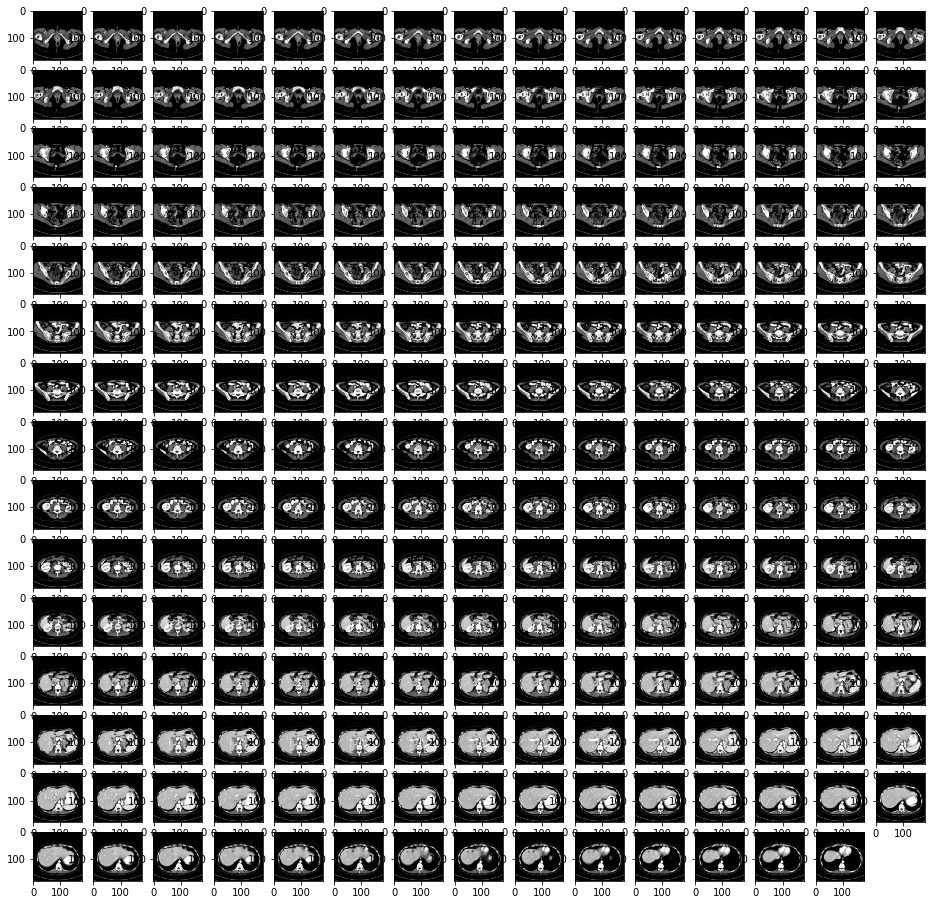

In [115]:
# print numpy array using matplotlib
fig=plt.figure(figsize=(16,16))
rows=15
colms=15
for i in range(1,rows*colms):
    fig.add_subplot(rows,colms,i)
    plt.imshow(numpyarraymha[i,:,:],cmap='gray', vmin=0, vmax=255)
plt.show()

In [137]:
imgemha4=sitk.ReadImage('.\dataset\Patient04Homo.mha')
print(imgemha4.GetSize())
#print(imgemha.Get())

(187, 187, 109)


In [138]:
numpyarraymha4=sitk.GetArrayFromImage(imgemha4)
print(numpyarraymha4.shape)

(109, 187, 187)


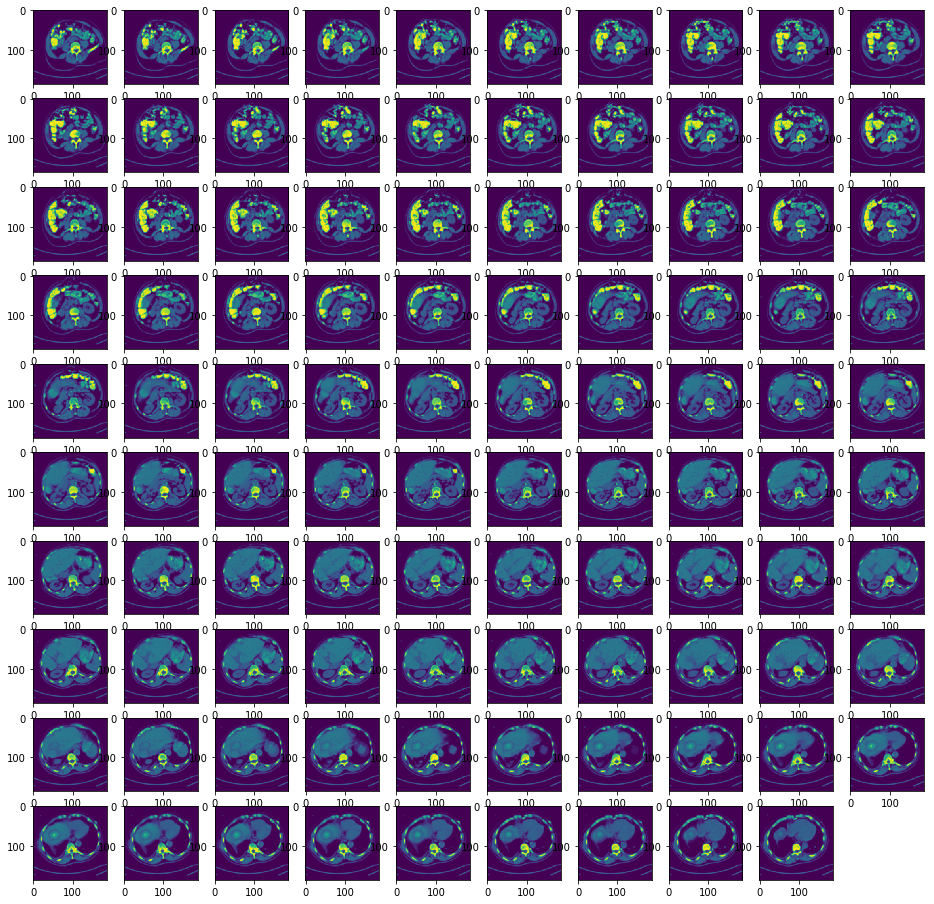

In [140]:
# print numpy array using matplotlib
fig=plt.figure(figsize=(16,16))
rows=10
colms=10
for i in range(1,rows*colms):
    fig.add_subplot(rows,colms,i)
    plt.imshow(numpyarraymha4[i,:,:])
plt.show()

In [129]:
imgemha4mask=sitk.ReadImage('.\dataset\Patient04Homo_Rad02.mha')
print(imgemha4mask.GetSize())
#print(imgemha.Get())

(187, 187, 109)


In [131]:
numpyarraymha4m=sitk.GetArrayFromImage(imgemha4mask)
print(numpyarraymha4m.shape)

(109, 187, 187)


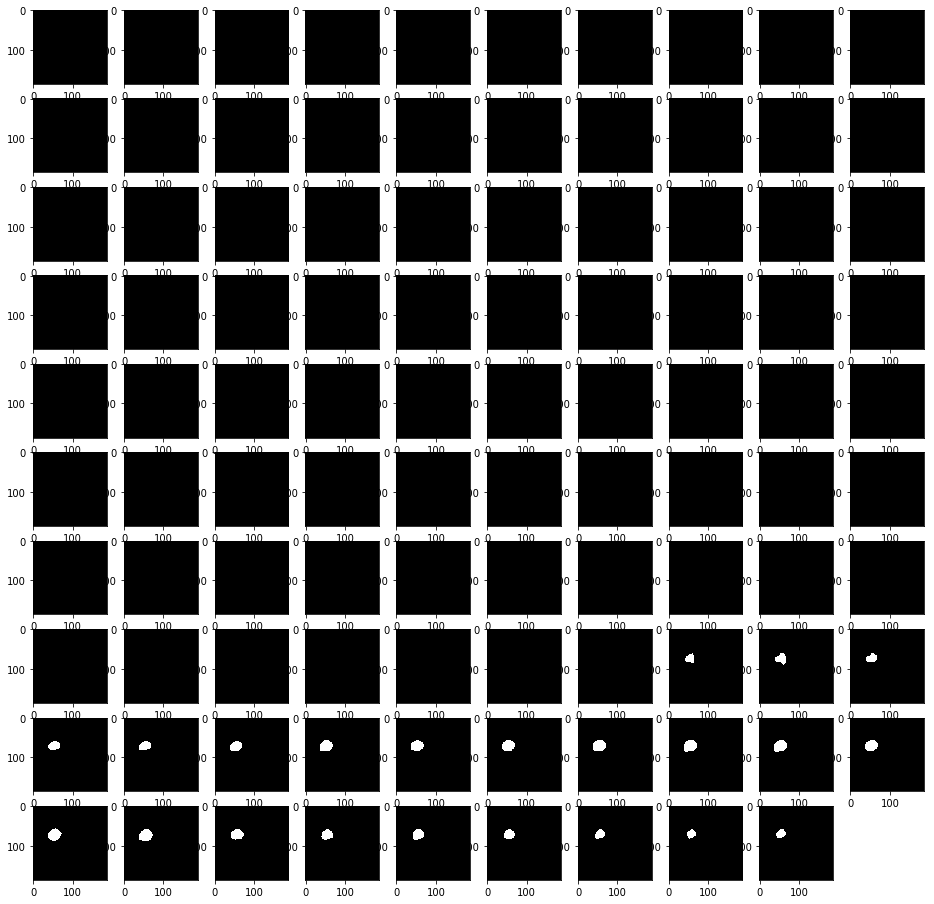

In [133]:
# print numpy array using matplotlib
fig=plt.figure(figsize=(16,16))
rows=10
colms=10
for i in range(1,rows*colms):
    fig.add_subplot(rows,colms,i)
    plt.imshow(numpyarraymha4m[i,:,:],cmap='gray')
plt.show()

In [134]:
imgemha4mask3=sitk.ReadImage('.\dataset\Patient04Homo_Rad03.mha')
print(imgemha4mask3.GetSize())
#print(imgemha.Get())
numpyarraymha4m=sitk.GetArrayFromImage(imgemha4mask3)
print(numpyarraymha4m.shape)

(187, 187, 109)
(109, 187, 187)


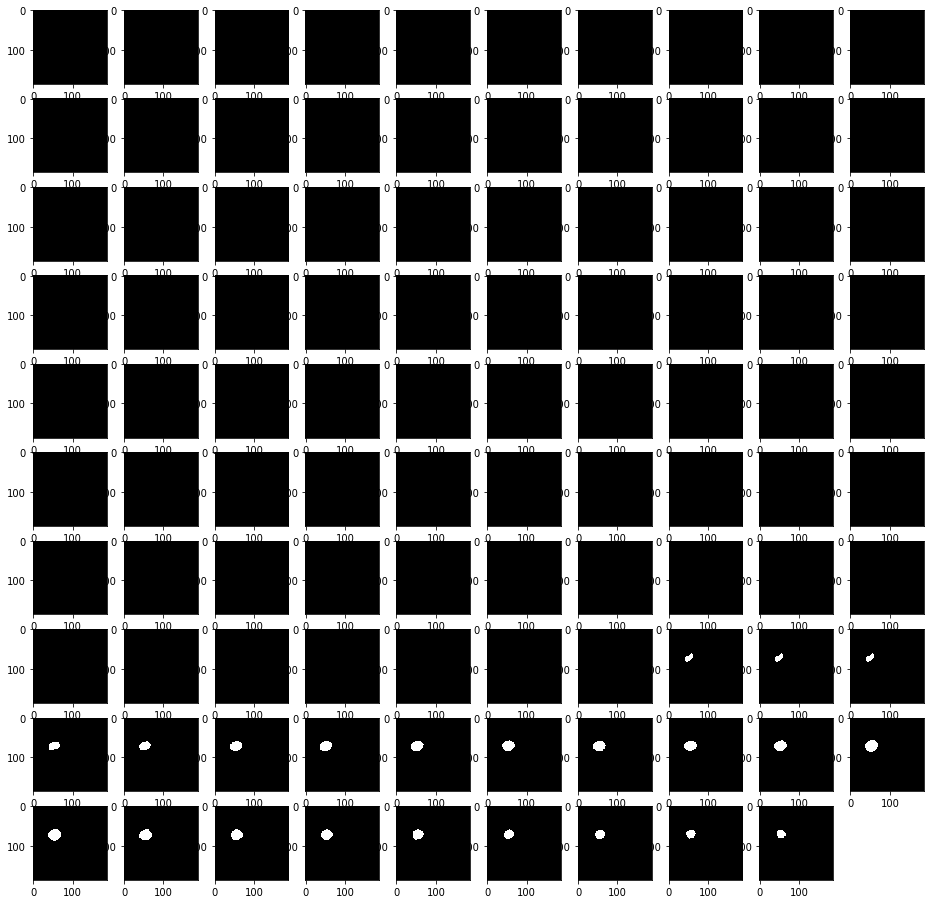

In [136]:
# print numpy array using matplotlib
fig=plt.figure(figsize=(16,16))
rows=10
colms=10
for i in range(1,rows*colms):
    fig.add_subplot(rows,colms,i)
    plt.imshow(numpyarraymha4m[i,:,:],cmap='gray')
plt.show()

In [111]:
maskmha=sitk.ReadImage('.\dataset\Patient02Homo_Rad01.mha')
print(maskmha.GetSize())
#print(imgemha.Get())

(180, 180, 258)


In [112]:
maskarray=sitk.GetArrayFromImage(maskmha)
print(maskarray.shape)

(258, 180, 180)


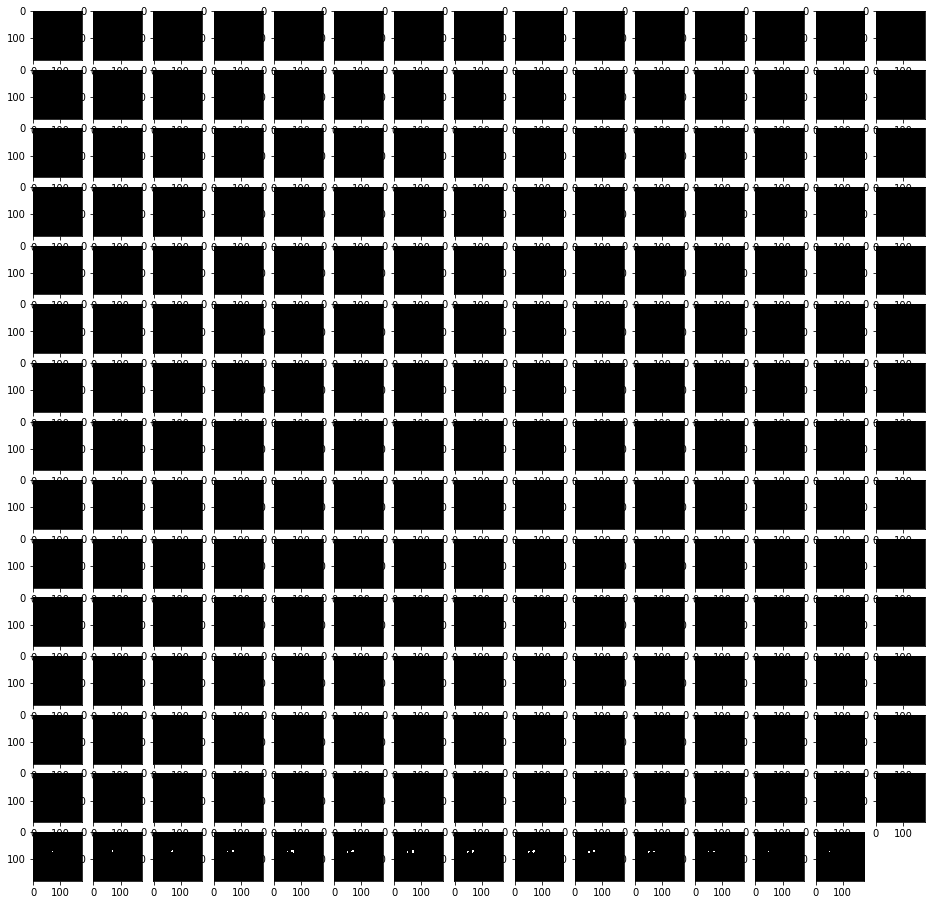

In [117]:
fig=plt.figure(figsize=(16,16))
rows=15
cols=15
for i in range(1,rows*cols):
    fig.add_subplot(rows,cols,i)
    plt.imshow(maskarray[i,:,:],cmap='gray')
    
plt.show()

In [119]:
maskmha2=sitk.ReadImage('.\dataset\Patient02Homo_Rad02.mha')
print(maskmha.GetSize())
#print(imgemha.Get())

(180, 180, 258)


In [120]:
maskarray2=sitk.GetArrayFromImage(maskmha2)
print(maskarray2.shape)

(258, 180, 180)


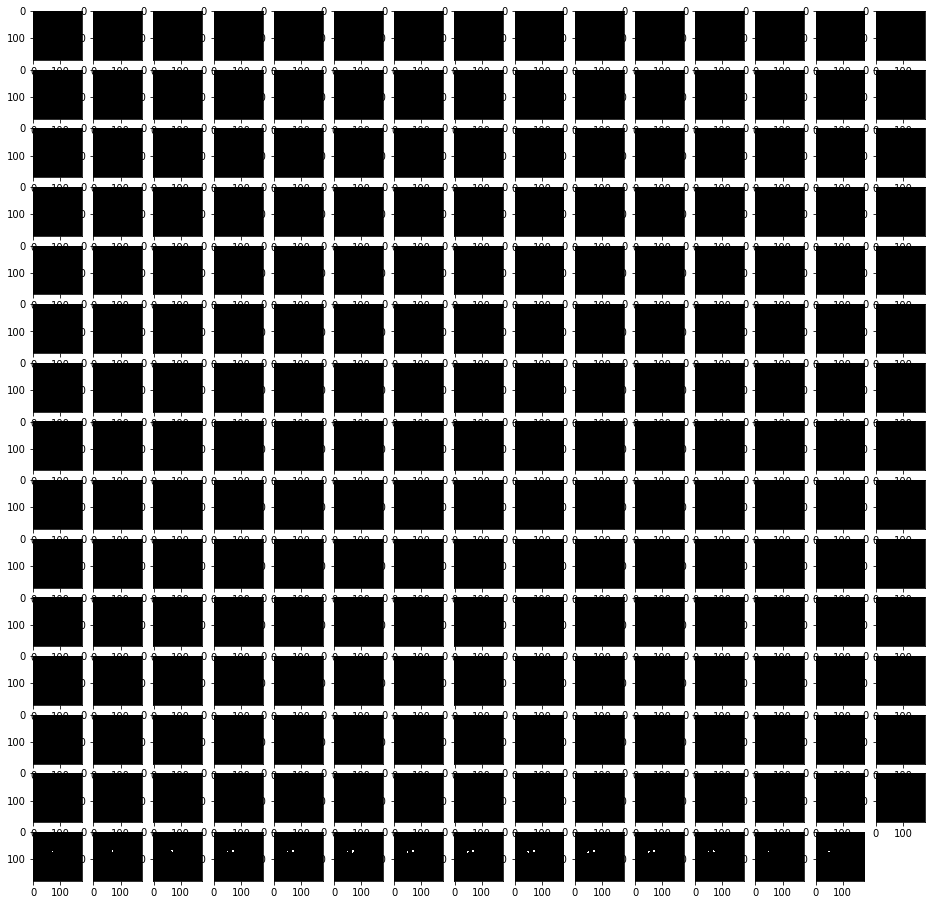

In [121]:
fig=plt.figure(figsize=(16,16))
rows=15
cols=15
for i in range(1,rows*cols):
    fig.add_subplot(rows,cols,i)
    plt.imshow(maskarray2[i,:,:],cmap='gray')
    
plt.show()

# Reading and Writing
SimpleITK can read and write images stored in a single file, or a set of files (e.g. DICOM series).

Images stored in the DICOM format have a meta-data dictionary associated with them, which 
is populated with the DICOM tags. When a DICOM series is read as a single image, 
the meta-data information is not available since DICOM tags are specific to each file. 
If you need the meta-data, you have three options:

Using the object oriented interface's ImageSeriesReader class, configure it to load the tags 
using the MetaDataDictionaryArrayUpdateOn method and possibly the LoadPrivateTagsOn method 
if you need the private tags. Once the series is read you can access the meta-data 
from the series reader using the GetMetaDataKeys, HasMetaDataKey, and GetMetaData.

Using the object oriented interface's ImageFileReader, set a specific slice's 
file name and only read it's meta-data using the ReadImageInformation 
method which only reads the meta-data but not the bulk pixel information. 
Once the meta-data is read you can access it from the file 
reader using the GetMetaDataKeys, HasMetaDataKey, and GetMetaData.

Using the object oriented interface's ImageFileReader, set a specific slice's 
file name and read it. Or using the procedural interface's, ReadImage function,
read a specific file. You can then access the meta-data directly from the 
Image using the GetMetaDataKeys, HasMetaDataKey, and GetMetaData.

In the following cell, we read an image in JPEG format, and write it as PNG and BMP. 
File formats are deduced from the file extension. Appropriate pixel type is also set - 
you can override this and force a pixel type of your choice.

In [ ]:
img = sitk.ReadImage(fdata('SimpleITK.jpg'))
print(img.GetPixelIDTypeAsString())

# write as PNG and BMP
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.bmp'))

# Write an image series as JPEG. 
The WriteImage function receives a volume 
and a list of images names and writes the volume according to the z axis. 
For a displayable result we need to rescale the image intensities (default is [0,255]) 
since the JPEG format requires a cast to the UInt8 pixel type.

In [ ]:
sitk.WriteImage(sitk.Cast(sitk.RescaleIntensity(written_image), sitk.sitkUInt8), 
                [os.path.join(OUTPUT_DIR, 'slice{0:03d}.jpg'.format(i)) for i in range(written_image.GetSize()[2])]) 

In [ ]:
# Image Display using sitk toolbox

In [ ]:
%matplotlib inline

# load modules
import numpy as np
import SimpleITK as sitk

import sys
sys.path.append('../src')
import volumerendering
import imagedisplay

In [ ]:
# Read the image
image = sitk.ReadImage('../sample_data/image2.nii.gz' )

# Image dimensions (width,height,depth)
imageSize = image.GetSize()

# Projection of the volume onto a 2D plane

In [ ]:
# Several 2-D projections along the same axis
imagedisplay.myshow3d( image,
                       yslices=range(50,imageSize[2]-50,12),
                       zslices=range(50,imageSize[2]-50,12), 
                       dpi=10 )

# Multi-plane projection and image labels

In [ ]:
# Read the image
image = sitk.ReadImage('../sample_data/image.nii.gz')

# Image dimensions (width,height,depth)
imageSize = image.GetSize()

# 3D planar view
slices =[ image[imageSize[0]/2,:,::-1],
          image[:,imageSize[1]/2,::-1], 
          image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Image", dpi=30)

# Load the annotations (gray matter, white matter, csf)
img_labels = sitk.ReadImage('../sample_data/labelmap.nii.gz')

# Display the annotations
slices = [ img_labels[imageSize[0]/2,:,::-1],
           img_labels[:,imageSize[1]/2,::-1],
           img_labels[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Segmentation", dpi=30)

# Volume rendering

In [ ]:
# load the second image
image2 = sitk.ReadImage('../sample_data/image2.nii.gz')
data = sitk.GetArrayFromImage(image2) # numpy array

# converting the pixel type to uint8 and rescaling
data = data.astype('float')
data /= data.max()
data *= 255
data = data.astype('uint8')

# intensity window and opacity value
win_b = 39.0
win_e = 72.0
win_m = (win_b+win_e)/2
opacity = 0.2

# volume rendering transfer function
tf = [ [0,0,0,0,0],
       [win_b,0,0,0,0],
       [win_m,1,1,1,0.2],
       [win_e,1,1,1,0],
       [data.max(),1,1,1,0] ]

# perform volume rendering (a new window should be opened - vtk inline display is not supported)
actor_list = volumerendering.volumeRender( data,
                                           tf=tf,
                                           spacing=image2.GetSpacing() )
volumerendering.vtk_basic( actor_list, embed=True ) # embed = True: displays a screenshot in the notebook
                                                    # embed = False: interactive VTK window

# filtering

In [ ]:
# this is to have matplotlib outputs embedded in the notebook
%matplotlib inline

# Load the python modules
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import imagedisplay

In [ ]:
# Read the image
image = sitk.ReadImage( "../sample_data/image.nii.gz" )

# Convolving images with a kernel: Sobel and mean filtering

In [ ]:
image =  sitk.Cast(image, sitk.sitkFloat32 )

# Create convolution filter object
conv = sitk.ConvolutionImageFilter()

# Sobel filter in X
filterX = sitk.Image( 3, 3, 3, sitk.sitkFloat32 )
for z in range( 0, filterX.GetSize()[2] ):
    for y in range( 0, filterX.GetSize()[1] ):
        filterX[0, y, z] = 1
        filterX[1, y, z] = 0
        filterX[2, y, z] = -1

# Sobel filter in Y
filterY = sitk.Image( 3, 3, 3, sitk.sitkFloat32 )
for z in range( 0, filterY.GetSize()[2] ):
    for x in range( 0, filterY.GetSize()[0] ):
        filterY[x, 0, z] = 1
        filterY[x, 1, z] = 0
        filterY[x, 2, z] = -1

# Mean filter
mean = sitk.Image( 3, 3, 3, sitk.sitkFloat32 )
for z in range( 0, mean.GetSize()[2] ):
    for y in range( 0, mean.GetSize()[1] ):
        for x in range( 0, mean.GetSize()[0] ):
            mean[x, y, z] = 1
            
# Convolve the image with different kernels
image2 = conv.Execute(image, filterX)
image3 = conv.Execute(image, filterY)
image4 = conv.Execute(image, mean)

# rescaling the intensities for better visualization
image = sitk.RescaleIntensity(image,0.0,255.0)
image2 = sitk.RescaleIntensity(image2,0.0,255.0)
image3 = sitk.RescaleIntensity(image3,0.0,255.0)
image4 = sitk.RescaleIntensity(image4,0.0,255.0)

imageSize = image.GetSize()
slices = [ image[:,:,imageSize[2]/2], 
           image2[:,:,imageSize[2]/2], 
           image3[:,:,imageSize[2]/2], 
           image4[:,:,imageSize[2]/2] ]
imagedisplay.myshow( sitk.Tile(slices, [4,1]),
                    title="Original image, X gradient, Y gradient, Mean filter",
                    dpi=16)

# Gaussian noise

In [ ]:
# Get a numpy array from a SimpleITK image
data = sitk.GetArrayFromImage(image) # numpy array

# Image dimensions
n_rows = imageSize[0]
n_cols = imageSize[1]
n_slices = imageSize[2]

# Add a gaussian noise to the image
mean = 0
sigma = max(data.flatten()) * 0.10
noise = np.random.normal(mean,sigma,(n_rows,n_cols,n_slices))
noisy_data = data + noise

# Put the numpy matrix back into a SimpleITK image object 
noisy_image = sitk.GetImageFromArray(noisy_data)
# Meta-information has to be copied from the original image:
# voxel spacing, orientation, and origin
sitk.Image.CopyInformation(noisy_image,image) 
 
slices =[ noisy_image[imageSize[0]/2,:,::-1],
          noisy_image[:,imageSize[1]/2,::-1],
          noisy_image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Gaussian noise", dpi=21)

# Gaussian blurring

In [ ]:
variance = 2.0
maximumKernelWidth = 10 # Maximum allowed kernel width 
                        # for any dimension of the discrete Gaussian approximation
maximumError = 0.01
useImageSpacing = True # The variance will be evaluated as pixel units if SetUseImageSpacing is off 
                       # or as physical units if SetUseImageSpacing is on

denoised_image = sitk.DiscreteGaussian(noisy_image,variance,maximumKernelWidth,maximumError,useImageSpacing)

slices = [ denoised_image[imageSize[0]/2,:,::-1],
           denoised_image[:,imageSize[1]/2,::-1],
           denoised_image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Gaussian blurring", dpi=21)

# Anisotropic diffusion filtering

In [ ]:
denoised_image = sitk.GradientAnisotropicDiffusion(noisy_image,0.120,3,1,6)
slices = [ denoised_image[imageSize[0]/2,:,::-1],
           denoised_image[:,imageSize[1]/2,::-1],
           denoised_image[:,:,imageSize[2]/2]]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Anisotropic diffusion filtering", dpi=21)

# Image downsampling

In [ ]:
# Sampling Factor
sFactor = 4.0

# Perform lowpass filtering to avoid aliasing
variance = sFactor / 2.0
maximumKernelWidth = 7
maximumError = 0.01
useImageSpacing = False
blurred_image = sitk.DiscreteGaussian( image,
                                       variance,
                                       maximumKernelWidth,
                                       maximumError,
                                       useImageSpacing )

#By default a 3-d identity transform is constructed
transformation = sitk.Transform()

#A linear interpolation is selected for resampling
interpolator = sitk.sitkLinear

# Copy meta information
imageSize = image.GetSize()
imageSpacing = image.GetSpacing()

new_imageSize = [int(float(z)/sFactor) for z in imageSize]
new_imageOrigin = image.GetOrigin()
new_imageDirection = image.GetDirection() 
new_imageSpacing = [z*sFactor for z in imageSpacing]

# Perform resampling
resampled_image = sitk.Resample( blurred_image,
                                 new_imageSize,
                                 transformation,
                                 interpolator,
                                 new_imageOrigin,
                                 new_imageSpacing,
                                 new_imageDirection )

slices = [ resampled_image[new_imageSize[0]/2,:,::-1],
           resampled_image[:,new_imageSize[1]/2,::-1],
           resampled_image[:,:,new_imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Downsampled image", dpi=5.25)

In [ ]:
# image histogram

In [ ]:
%matplotlib inline

# Load the python modules
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import imagedisplay

# Contrast Enhancement

In [ ]:
def contrast(image, c=1, gamma=2.2):
    return c* pow(image, gamma)

In [ ]:
# Convert image to python array
imagefilename = "../sample_data/image.nii.gz"
image = sitk.ReadImage(imagefilename)
data = sitk.GetArrayFromImage(image)

gamma = 2.2;
corr_constant = 1.0;
data2 = contrast(data, corr_constant, gamma)

image2 = sitk.GetImageFromArray(data2)
image2.CopyInformation(image)
imageSize = image2.GetSize()

slices = [ image[imageSize[0]/2,:,:],
           image[:,imageSize[1]/2,:], 
           image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Original image", dpi=28)

slices2 =[ image2[imageSize[0]/2,:,:],
           image2[:,imageSize[1]/2,:],
           image2[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices2, [3,1]), title="Contrast-enhanced image", dpi=28)

# Histogram of intensity values

In [ ]:
# Read the input image
image = sitk.ReadImage(imagefilename)

In [ ]:
# Read maximum and minimum intensity values
stats = sitk.StatisticsImageFilter()
stats.Execute( image )
max = stats.GetMaximum()
min = stats.GetMinimum()
print 'Min intensity = {0} \nMax intensity = {1}'.format(min, max)

In [ ]:
# Plot the intensity histogram
data = sitk.GetArrayFromImage(image)
plt.figure(figsize=(8, 5), dpi=100)
plt.subplot(211)
plt.hist(data.flatten(), bins=32, range=(10, 255), normed=True)
plt.xlim(0,255)
plt.title('Intensity histogram')
plt.subplot(212)
plt.hist(data.flatten(), bins=32, range=(10, 255), normed=True, cumulative=True)
plt.xlim(0,255)
plt.show()

# Histogram equalization

In [ ]:
def histeq(image, nbins=256):
    
    # Compute image histogram
    histo,bins = np.histogram(image.flatten(),nbins,normed=True)
    
    # Compute cumulative distribution function and normalize
    cdf = histo.cumsum()    
    cdf = 255 * cdf / cdf[-1]
    
    # Use linear interpolation of cdf to find new pixel values
    image2 = np.interp(image.flatten(),bins[:-1],cdf)
                    
    return image2.reshape(image.shape)

In [ ]:
image = sitk.ReadImage(imagefilename)
data = sitk.GetArrayFromImage(image)
data2 = histeq(data)

# Plot histogram before equalisation
plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(221)
plt.hist(data.flatten(),range=(10, 255), bins=64, normed=True)
plt.xlim(0,255)
plt.title('Before histogram equalisation')
plt.subplot(222)
plt.hist(data.flatten(), bins=64, normed=True, cumulative=True)
plt.xlim(0,255)
plt.title('Before histogram equalisation (cumulative)')

plt.subplot(223)
plt.hist(data2.flatten(),range=(10, 255), bins=64, normed=True)
plt.xlim(0,255)
plt.title('After histogram equalisation')
plt.subplot(224)
plt.hist(data2.flatten(), bins=64, normed=True, cumulative=True)
plt.xlim(0,255)
plt.title('After histogram equalisation (cumulative)')
plt.show()

In [ ]:
# Create image from array and copy header from old image
image2 = sitk.GetImageFromArray(data2)
image2.CopyInformation(image)
imageSize = image2.GetSize()

slices = [ image[imageSize[0]/2,:,:], 
           image[:,imageSize[1]/2,:], 
           image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Original image", dpi=28)

slices2 =[ image2[imageSize[0]/2,:,:], 
           image2[:,imageSize[1]/2,:], 
           image2[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices2, [3,1]), title="Histogram-equalised image", dpi=28)